In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_moons, make_blobs

#  Classification

In [3]:
x,y = make_blobs(n_samples=1000, shuffle=True, centers=2, cluster_std=1.0, random_state=0)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [5]:
y_train

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [6]:
x_train[:10]

array([[ 2.82594058e+00,  7.67223926e-01],
       [ 3.66378968e+00,  3.36084910e-01],
       [ 1.43940041e+00,  4.58288309e+00],
       [ 1.67472723e+00,  4.30755822e+00],
       [-9.69433005e-01,  3.39100383e+00],
       [ 1.33532699e+00,  4.08925762e-03],
       [ 1.97015192e+00,  3.33362627e-01],
       [-1.57671974e+00,  4.95740592e+00],
       [ 3.10029090e+00,  1.49670319e+00],
       [ 1.91718769e+00,  4.70899141e+00]])

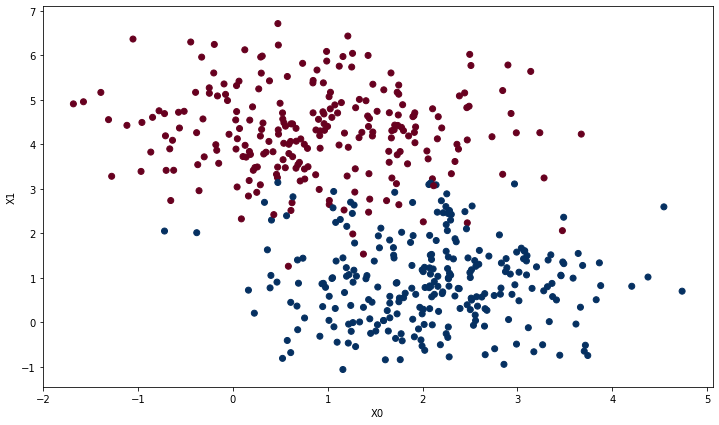

In [15]:
plt.figure(figsize=(12,7))
# График разброса y от x с разным размером и / или цветом маркера.
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
# try linear regrassion

In [16]:

from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
xdf = pd.DataFrame(x_train)
xdf['y'] = y_train
xdf

,0,1,y
0,2.825941,0.767224,1
1,3.663790,0.336085,1
2,1.439400,4.582883,0
3,1.674727,4.307558,0
4,-0.969433,3.391004,0
...,...,...,...
495,1.470012,4.187683,0
496,3.741060,-0.750383,1
497,1.013276,5.071690,0
498,3.094364,1.376759,1


In [23]:
train_predition = reg.predict(x)
test_prediction = reg.predict(x_test)

In [24]:
test_prediction[:10]

array([0.13220195, 1.13270504, 0.02102261, 1.0645919 , 1.282674  ,
       0.71798045, 1.21462425, 0.11455155, 0.8146871 , 0.86839569])

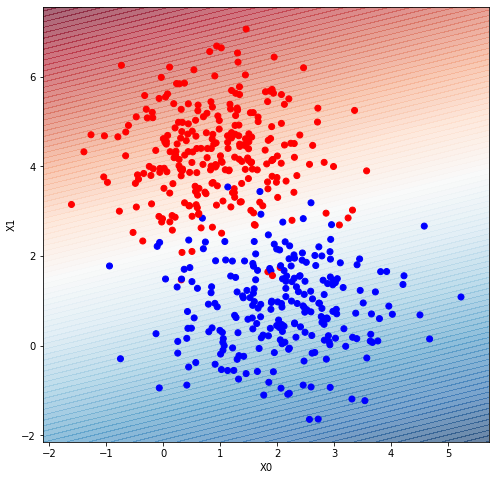

In [34]:
h = .01
x_min, x_max = x_test[:, 0].min() - .5, x_test[:, 0].max() + .5
y_min, y_max = x_test[:, 1].min() - .5, x_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bridght = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(8,8))
z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=cm, alpha=0.6, levels=100)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bridght, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

##  Problemeses?

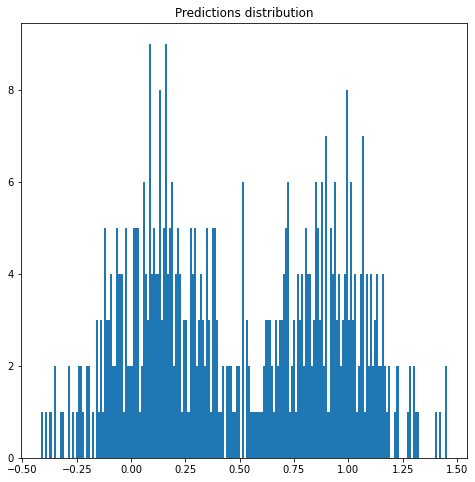

In [36]:
plt.figure(figsize=(8,8))
plt.hist(test_prediction, bins=200)
plt.title("Predictions distribution")
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
train_clf_prediction = clf.predict_proba(x_train)[:, 0]
test_clf_prediction = clf.predict_proba(x_test)[:, 0]

In [39]:
print(clf.coef_, clf.intercept_)

[[ 0.7485211  -2.76695462]] [6.2779283]


$y =sigmoid(z)$ 

In [40]:
clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

array([9.99975877e-01, 9.99976057e-01, 9.99976236e-01, ...,
       3.16359065e-05, 3.18735889e-05, 3.21130568e-05])

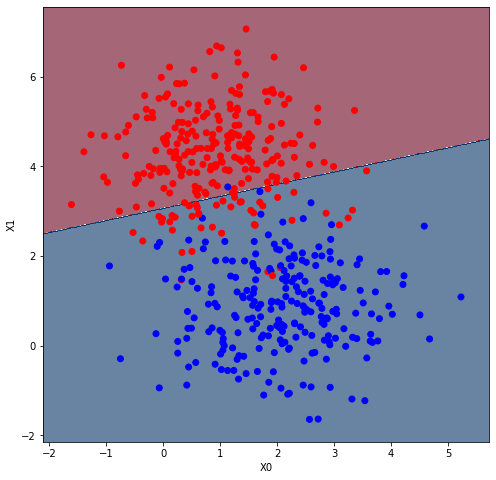

In [41]:
h = .01
x_min, x_max = x_test[:, 0].min() - .5, x_test[:, 0].max() + .5
y_min, y_max = x_test[:, 1].min() - .5, x_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bridght = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(8,8))
z = (clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]>0.1)*1
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=cm, alpha=0.6, levels=100)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bridght, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

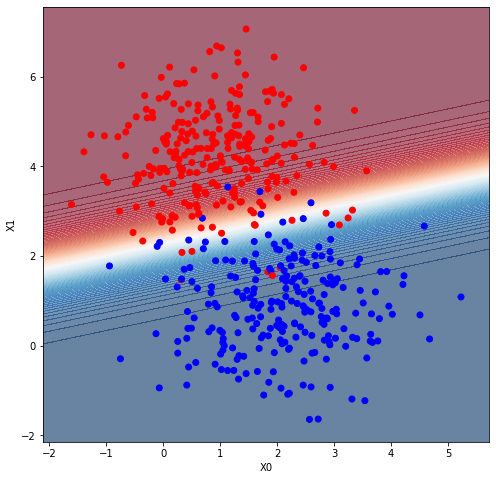

In [43]:
h = .01
x_min, x_max = x_test[:, 0].min() - .5, x_test[:, 0].max() + .5
y_min, y_max = x_test[:, 1].min() - .5, x_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bridght = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(8,8))
z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=cm, alpha=0.6, levels=100)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bridght, alpha=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show() 

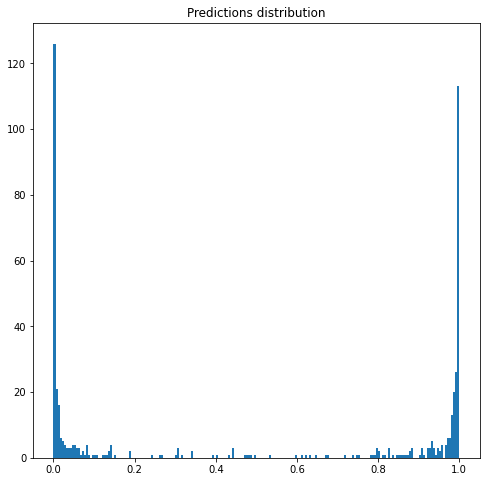

In [44]:
plt.figure(figsize=(8,8))
plt.hist(test_clf_prediction, bins=200)
plt.title("Predictions distribution")
plt.show()

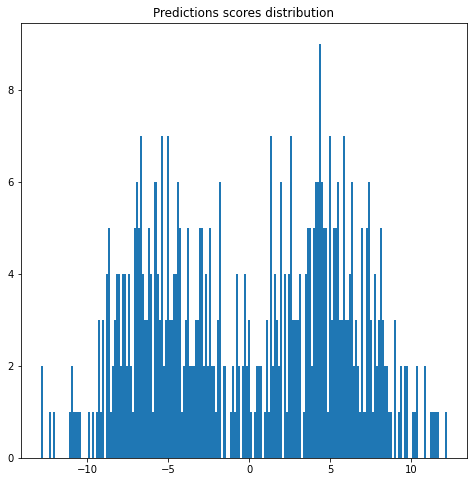

In [45]:
plt.figure(figsize=(8,8))
score = -np.log((1/test_clf_prediction)-1)
plt.hist(score, bins=200)
plt.title("Predictions scores distribution")
plt.show()

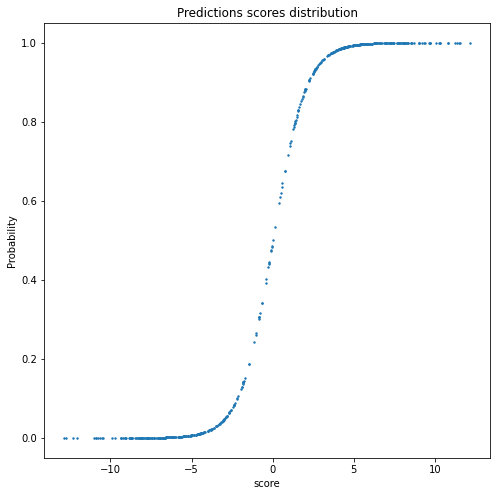

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(score, test_clf_prediction, s=2)
plt.title("Predictions scores distribution")
plt.xlabel("score")
plt.ylabel("Probability")
plt.show()

#  Как оценить качество результата?

$$\begin{equation*} y = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
= 
\begin{bmatrix}
1 \\
0 \\
\vdots \\
1 \\
\end{bmatrix}
\end{equation*}$$

$$\begin{equation*} y = 
\begin{bmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n \\
\end{bmatrix}
= \begin{bmatrix}
0 \\
1 \\
\vdots \\
1 \\
\end{bmatrix}
\end{equation*}$$

### Actual Value
| positives   | negatives   |
| ----------- | ----------- |
| True Positive  | False Positive       |
| False Negative  | True Negative        |

In [49]:
y_true = np.array((1,0,1,1,1,0,1))
y_pred = np.array((0,0,1,0,1,0,1))

In [ ]:
def TP(y_true, y_pred): 
    